# Table of Contents
1. [Simulating a uniform distribution inside a circle](#UniformInCircle)
   1. [a), b), c) Three different methods](#UCabc)
         1. [Implementation](#UCabcImplementation)
         2. [Results](#UCabcResults)
   2. [d) Compare the outcomes of b) and c). Explain the difference.](#UCd)
   3. [When generating more points](#UCMorePoints)
2. [Why Using Log Binning and Scaling](#LogBinAndScale)
    1. [a) Show the derivation and $x = F^{-1}(y)$; generate $1000$ points](#LBASa)
    2. [b) linear binning and histogram](#LBASb)
    3. [c) linear binning and midpoints](#LBASc)
    4. [d) logarithmic binning and midpoints (and histogram)](#LBASd)
    5. [e) What did we gain by doing logarithmic instead of linear binning](#LBASe)
    6. [f) Compare with the rejection method](#LBASf)

In [2]:
import random 
import time 

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# 1. Simulating a uniform distribution inside a circle<a name="UniformInCircle"></a>
In this task, we need to simulate a uniform distribution **inside** a circle, where: 
- circle centers at $(0, 0)$,
- radius $R = 1$,
- $2000$ generated points $(x, y)$; we can also try $20000$ points.

## a), b), c) Three different methods <a name="UCabc"></a>
### Implementation<a name="UCabcImplementation"></a>
First of all, let's implemenet the Random Point Generator with three different sampling methods: 
- Rejection method enveloping the circle by a square,
- Inverse distribution method using incorrect pdf: using Polar coordinates where both radius $r$ and degree $\theta$ are drawed from uniform distributions,
- Inverse distribution method using correct pdf: using Polar coordinates where radius $r$ is drawed from the correct pdf $p(r) = C2\pi r$.

In [3]:
class RPGCircle:
    """Random Point Generator for uniform distribution in a circle
    Args: 
    -----
    radius: float
        the radius of the circle.
    num_samples: int 
        number of points to generate.
    circle_center: (float, float)
    """
    def __init__(self, 
                 radius: float=1, 
                 num_samples: int=2000, 
                 circle_center: Tuple=(0, 0)):
        self.radius = radius
        self.num_samples = num_samples
        self.circle_center = circle_center
        
        self.center_X, self.center_Y = circle_center
    
    def plot(self, X, Y, axs=None): 
        """plot the target cicle and generated points"""
        if axs is not None:
            circle= plt.Circle(self.circle_center, self.radius, color='grey', fill=False)
            axs.add_patch(circle)
            axs.scatter(X, Y, s=5)
        else: 
            circle= plt.Circle(self.circle_center, self.radius, color='grey', fill=False)
            plt.scatter(X, Y, s=5)
    
    def rejection_method(self, axs=None):
        """Rejection method enveloping the circle by a square,
        
        Returns: 
        ------
        X: np.array
            the X values of generated points
        Y: np.array
            the Y values of generated points
        """
        X, Y = list(), list()
        num_generated = 0
        # 
        min_lims = (-self.radius, -self.radius)
        max_lims = (self.radius, self.radius)
        
        st = time.time()
        while num_generated < self.num_samples: 
            x, y = np.random.uniform(low=min_lims, high=max_lims)
            if x**2 + y**2 < self.radius**2:
                X.append(x)
                Y.append(y)
                num_generated += 1
        et = time.time()
        print(f'[a) Rejection Method]: time: {et - st: .4f}s')
        
        X, Y = np.array(X)+self.center_X, np.array(Y)+self.center_Y # shift the points to circle position.
        self.plot(X, Y, axs)
        return X, Y
    
    def uniform_polar_coordinate(self, axs=None):
        """Inverse distribution method using incorrect pdf: using Polar coordinates where both radius $r$ and degree $\theta$ are drawed from uniform distributions,"""
        X, Y = list(), list()
        # first draw r and theta from uniform distributions
        min_lims = (0, 0)
        max_lims = (1, 1)
        
        st = time.time()
        for _ in range(self.num_samples):
            r, theta = np.random.uniform(low=min_lims, high=max_lims)
            # transform to targeted interval
            r = self.radius*r
            theta = 2*np.pi*theta
            
            x = r*np.cos(theta)
            y = r*np.sin(theta)
            X.append(x)
            Y.append(y)
        et = time.time()
        print(f'[b) Inverse Distribution Method using Incorrect PDF]: time: {et - st: .4f}s')
        
        X, Y = np.array(X)+self.center_X, np.array(Y)+self.center_Y # shift the points to circle position.
        self.plot(X, Y, axs)
        return X, Y
    
    def correctpdf_polar_coordinate(self, axs=None):
        """Inverse distribution method using correct pdf: using Polar coordinates where radius $r$ is drawed from the correct pdf $p(r) = C2\pi r$.
        https://stackoverflow.com/questions/5837572/generate-a-random-point-within-a-circle-uniformly/50746409#50746409"""
        X, Y = list(), list()
        # first draw r and theta from uniform distributions
        min_lims = (0, 0)
        max_lims = (1, 1)
        
        st = time.time()
        for _ in range(self.num_samples):
            r, theta = np.random.uniform(low=min_lims, high=max_lims)
            # transform to targeted interval
            r = self.radius * np.sqrt(r) 
            theta = 2*np.pi*theta
            x = r*np.cos(theta)
            y = r*np.sin(theta)
            X.append(x)
            Y.append(y)
        et = time.time()
        print(f'[c) Inverse Distribution Method using Correct PDF]: time: {et - st: .4f}s')
        
        X, Y = np.array(X)+self.center_X, np.array(Y)+self.center_Y # shift the points to circle position.
        self.plot(X, Y, axs)
        return X, Y

### Results<a name="UCabcResults"></a>
The time usage and plottings for each method are shown below, where plottings are arranged from left to right in order. It can be observed that by using the polar coordinate we do improve the computational efficiency. 

[a) Rejection Method]: time:  0.1037s
[b) Inverse Distribution Method using Incorrect PDF]: time:  0.0895s
[c) Inverse Distribution Method using Correct PDF]: time:  0.0928s


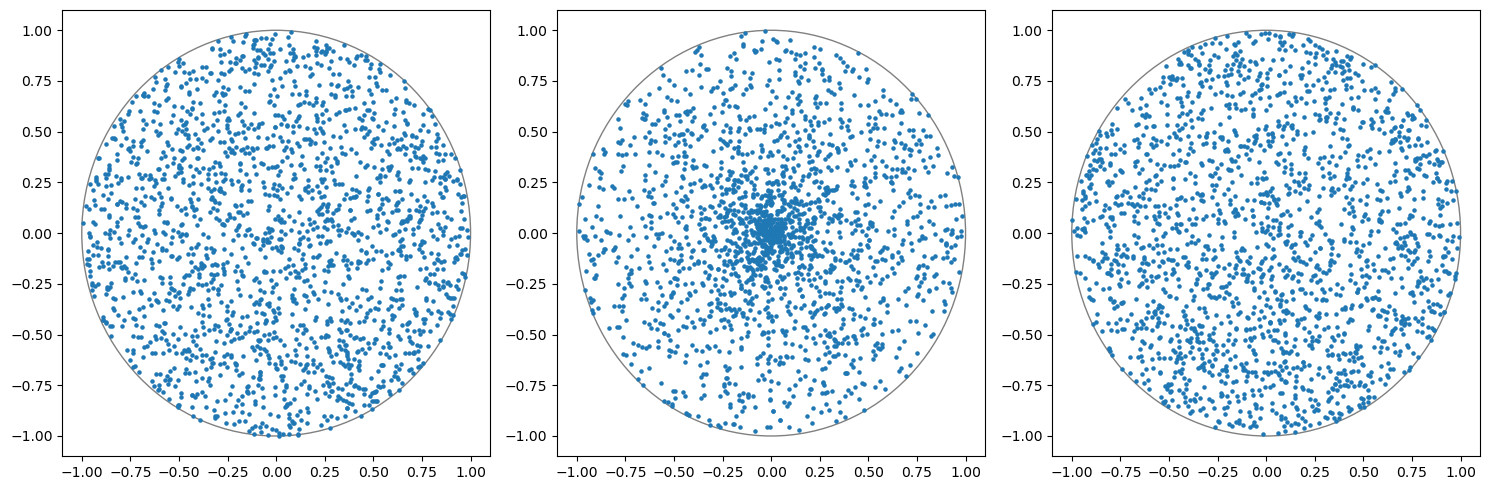

In [4]:
rpgcircle = RPGCircle()
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
rpgcircle.rejection_method(axs[0])
rpgcircle.uniform_polar_coordinate(axs[1])
rpgcircle.correctpdf_polar_coordinate(axs[2])
plt.tight_layout()

## d) Compare the outcomes of b) and c). Explain the difference. <a name="UCd"></a>
1. Comparison and simple explanation: </br>
The incomplete inverse distribution method in b), however, generates more points towards the center, since we sample the radius from uniform distributions, while points on circles with smaller radius will be closer to each other comparing to points on concentric circles with larger radius. This behavior is undesirable, Instead, the complete inverse distribution method in c) fixes this issue by sampling $r$ from the correct pdf and applying proper transformation from uniform variables to $r$. More specific exlanation and derivation of pdf and transformation is shown below.

2. Derivation of $r$'s pdf and transformation:</br>
The distance between points are supposed to be the same no matter how far they are from the circle center, which implies that the number of times we sample from a circle with a certain circumference should increase linearly with the circumference. Thus that the correct PDF of circumference $c$ 
$$
\text{PDF}(c) = f(c) = \frac{2}{C^2}c 
$$
Where $C = 2\pi R$. Given the relation $c = 2\pi r, r = g(c) = \frac{1}{2\pi}c$, we can further obtain the PDF and CDF of $r$
$$
\begin{aligned}
\text{PDF}(r) &= \frac{\partial (g^{-1}(r))}{\partial r}f(g^{-1}(r)) \\
&= \frac{\partial (2\pi r)}{\partial r}\frac{2}{(2\pi R)^2}2\pi r \\
&= \frac{1}{\pi R^2} 2\pi r, 
\\ \text{CDF}(r) &= \frac{1}{\pi R^2} \pi r^2 =  \frac{r^2}{R^2}
\end{aligned}
$$
Now we can mirror a uniformly sampled variable $v$ to the distribution of $r$ by inverse CDF, i.e. the transformation for generating $r$ from $v$
$$
\text{CDF}^{-1}(v) = r = R\sqrt{v}
$$

## When generating more points<a name="UCMorePoints"></a>
Let's generate $20000$ points instead of $2000$ this time. The distribution of points in all plottings below are very dense, which make it more difficult to identify wrong distributions. Therefore, such geometric distributions sometimes need to be checked with a small number of points.

[a) Rejection Method]: time:  1.1750s
[b) Inverse Distribution Method using Incorrect PDF]: time:  1.0594s
[c) Inverse Distribution Method using Correct PDF]: time:  1.1072s


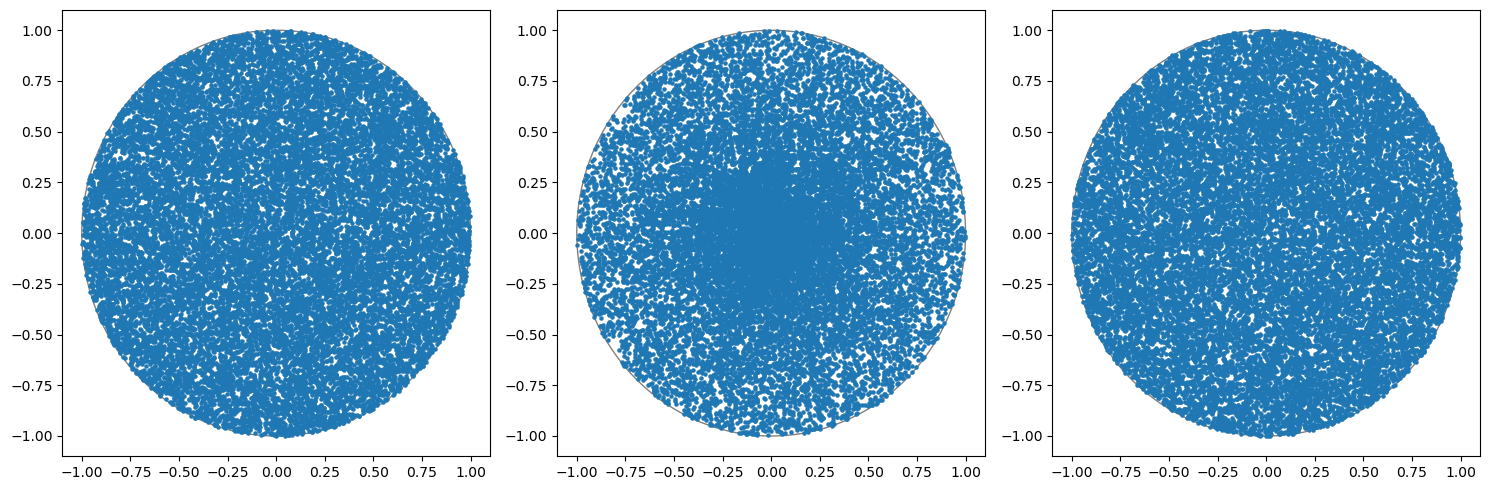

In [5]:
rpgcircle = RPGCircle(num_samples=20000)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
rpgcircle.rejection_method(axs[0])
rpgcircle.uniform_polar_coordinate(axs[1])
rpgcircle.correctpdf_polar_coordinate(axs[2])
plt.tight_layout()

# 2. Why Using Log Binning and Scaling<a name="LogBinAndScale"></a>
(especially for processes with strongly skewed distributions)

The PMF of fragments, i.e. the number of fragment $\#$ of mass $x$, is of the logarithmic (power-law) form $\#(x) \propto C x^{-3/2} (>0)$; According PDF $f(x) = C x^{-3/2}$.

## a) Show the derivation and $x = F^{-1}(y)$; generate $1000$ points<a name="LBASa"></a>
1. **derivation and transformation**</br>
The integration of PDF $f(x)$ on given range $x \in [1, \infty)$ should be $1$, 
$$
\int _1 ^{\infty}f(x)dx  = \int _1 ^{\infty}C x^{-3/2} dx = [-2C x^{-1/2}] _1 ^{\infty} = 2C =1\\
C = \frac{1}{2}\\ 
f(x) = \frac{1}{2} x^{-3/2}
$$
the range of $f(x)$ is $(0, \frac{1}{2}]$. the corresponding CDF $F(x)$ 
$$
F(x) = \int _1 ^{x}f(x)dx  = \int _1 ^{x} \frac{1}{2} x^{-3/2} dx = [- x^{-1/2}] _1 ^{x} = - x^{-1/2} + 1, x \geq 1
$$
the inverse transformation $x = F^{-1}(y) = (1-y)^{-2}, y\in [0, 1)$.</br>
(Note that here is a multiplicative process like the one in Assignment 1, Problem 2 c); but in what follows we just directly simulate the resulting distribution by the inverse distribution method.)

2. **generate data**</br>
Then we generate data of $1000$ points, using the scaled $F^{-1}(y/A), A = 200000$ (for numerical reasons, draw $y$ from $U[0, B], B = 190000$).</br>

In [6]:
def inverse_distribution_method(A: float=200000, 
                  B: float=190000,
                  num_samples: int=1000):
    """generate data of `num_samples` points from the inverse distribution.
    Args:
    -----
    A: float
        we use the scale F^{-1}(y/A)
    B: float 
        for numerical reasons, draw y from U[0,B] (B < A) instead of U[0, A]
    num_samples: int
        number of samples
    Returns:
    -------
    x: numpy.array
    """
    st = time.time()
    y = np.random.uniform(0, B, num_samples)
    x = np.power(1-y/A, -2)
    et = time.time()
    print(f'[Inverse Distribution Method]: time: {et - st: .4f}s')
    return x

In [7]:
def pmf(DATA,log_binning=False, log_coordinate=False, plot_mid=False, axs=None):
    """probability mass function given by histograms.
    Args: 
    ----
    log_binning: boolean
        whether to use linear binning or logarithmic binning.
    log_coordinate: boolean 
        whether to use linear coordinate or logarithmic coordinate.
    plot_mid: boolean
        whether to use midpoints for binned data visualization or histogram
    """
    if axs == None: 
        fig, axs = plt.subplots(1, 1)
        
    START_VALUE, STOP_VALUE = 1, np.ceil(DATA.max() / 100).astype(int) * 100 # STOP_VALUE: round up to nearest k*100 
    NUMBER_OF_BINS = 30
    binning_name = 'logarithmic binning' if log_binning else 'linear binning'
    coordinate_name = 'logarithmic coordinates' if log_coordinate else 'linear coordinates'
    plot_name = 'midpoints' if plot_mid else 'histogram'
    
    # binning 
    if log_binning:
        bins = np.logspace(start=np.log10(START_VALUE), stop=np.log10(STOP_VALUE), num=NUMBER_OF_BINS) # logarithmic binning
    else: 
        bins = np.linspace(start=START_VALUE, stop=STOP_VALUE, num=NUMBER_OF_BINS) # linear binning
        # logarithmic coordinates (for both x and y!)
    if log_coordinate:
        axs.set_xscale('log')
        axs.set_yscale('log')
        
    if plot_mid:
    # midpoints
        # determine the midpoints of the bins and plot the binned data values at these midpoints.
        values, edges = np.histogram(DATA, bins=bins, density=True)
        centers = 0.5*(edges[1:] + edges[:-1])
        axs.plot(centers, values, '*')
    else:
    # histogram
        values, edges, _ = axs.hist(DATA, bins=bins, density=True, color='lightblue')
        centers = 0.5*(edges[1:] + edges[:-1])
        
    # also plot the line c*x^{-3/2}, where cofficient c enforce the line to go through the first midpoint
    # for the line to sweep close to the pdf
    c = values[0]/np.power(centers[0], -3/2)
    x = np.linspace(START_VALUE, STOP_VALUE, 1000)
    y = c*np.power(x, -3/2)
    axs.plot(x, y, '-', alpha=0.5)
     
    if not log_coordinate:
        axs.set_ylim((0, values[0]+0.02)) # choose the range of linear coordinates, so that data can be seen 
    axs.set_title(f'{binning_name}, {coordinate_name}, {plot_name}')

In [8]:
DATA = inverse_distribution_method()

[Inverse Distribution Method]: time:  0.0012s


## b) linear binning and histogram<a name="LBASb"></a>
Two plots below are obtained by following steps:
1. do **linear binning**,
2. first plot the binned data as a **histogram** of the bins **in linear coordinates**, 
3. then plot the binned data as a **histogram** of the bins **in logarithmic coordinates**. Note that to see if PDF is logarithmic (power-law), we need to use logarithmic scale for *both* the $x-$ and $y-$ axis.
4. in both plots, **the line $c\cdot x^{-3/2}$** is also included, where efficient $c$ enforces the line to go through the midpoint of the first bin for sweeping it closer to the pdf.

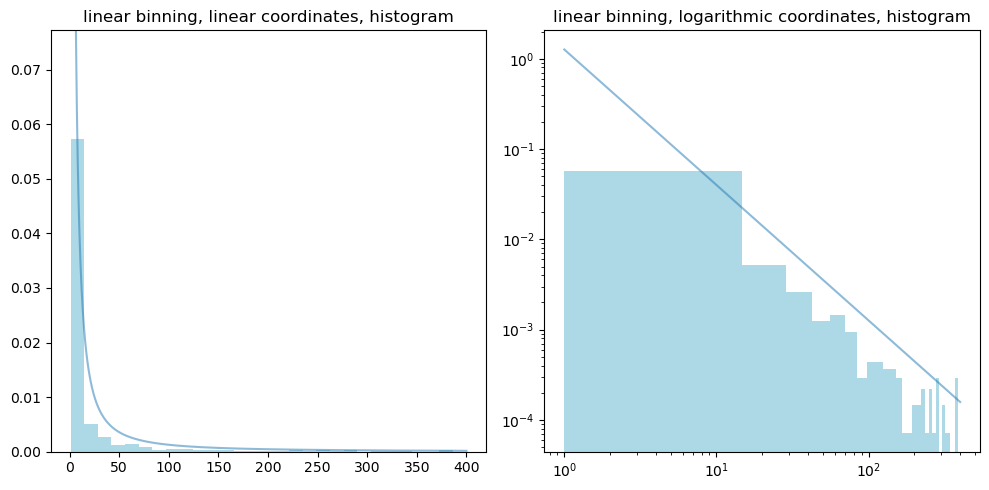

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

pmf(DATA, log_binning=False, log_coordinate=False, plot_mid=False, axs=axs[0]) 
pmf(DATA, log_binning=False, log_coordinate=True, plot_mid=False, axs=axs[1]) 

plt.tight_layout()

## c) linear binning and midpoints<a name="LBASc"></a>
Based on histograms in b), we determine the **midpoints** of the bins and plot these midpoints and **the line $c\cdot x^{-3/2}$** as described before for each histogram.

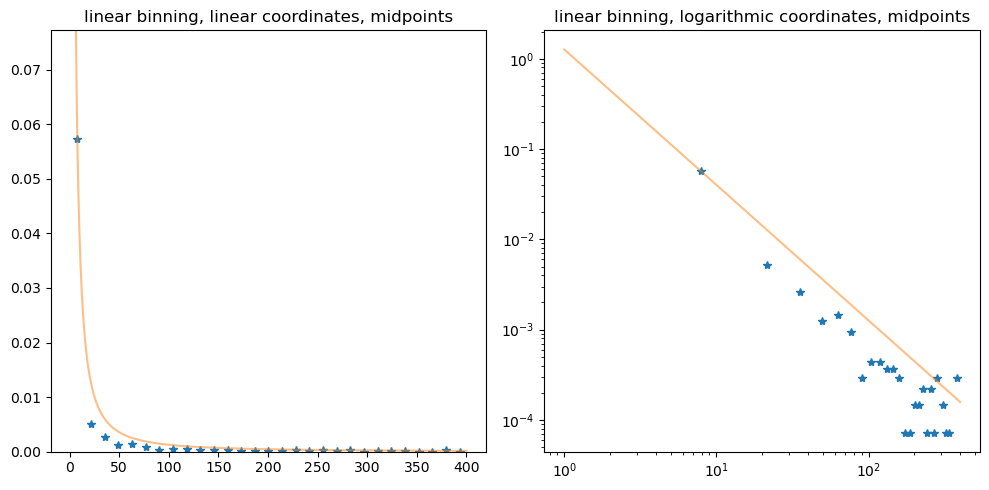

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

pmf(DATA, log_binning=False, log_coordinate=False, plot_mid=True, axs=axs[0]) 
pmf(DATA, log_binning=False, log_coordinate=True, plot_mid=True, axs=axs[1]) 

plt.tight_layout()

## d) logarithmic binning and midpoints (and histogram)<a name="LBASd"></a>
Two plots below are obtained by following steps:
1. do **logarithmic binning**,
2. first plot the binned data as a **midpoints** of the bins **in logarithmic coordinates**, 
3. then plot the binned data as a **histogram** of the bins **in logarithmic coordinates**. 
4. in both plots, **the line $c\cdot x^{-3/2}$** as described before is also included.

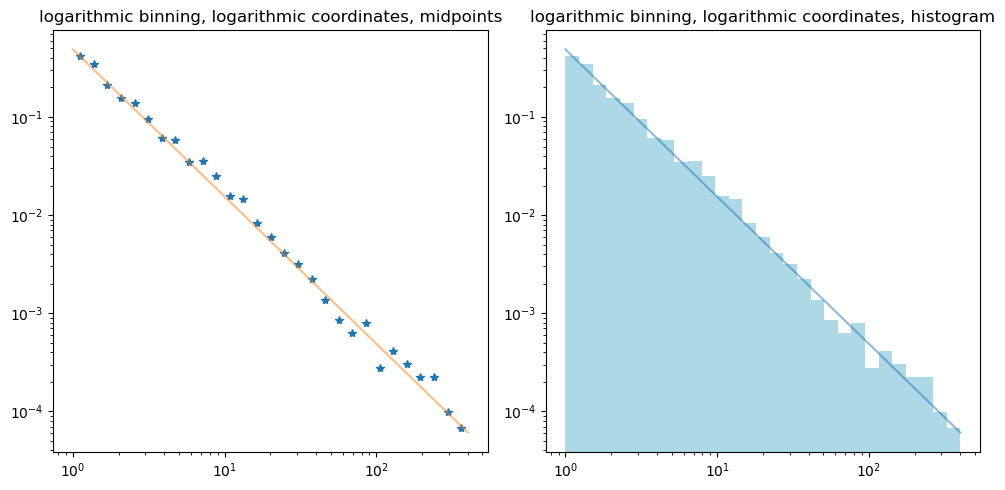

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

pmf(DATA, log_binning=True, log_coordinate=True, plot_mid=True, axs=axs[0]) 
pmf(DATA, log_binning=True, log_coordinate=True, plot_mid=False, axs=axs[1]) 

plt.tight_layout()

## e) What did we gain by doing logarithmic instead of linear binning<a name='LBASe'></a> 
As we know, we are simulating a power-law (logarithmic) distribution, whose PDF $f(x) \propto x^{-\alpha}$ (of course here we know $\alpha = 3/2$) is highly skewed. This means that if we split the $x-$ axis evenly (linearly), there will be more points in intervals for smaller $x$ than those for larger $x$. This is undesirable as bins for larger value will be less representative, which can be observed from plots in b) and c).

By doing logarithmic binning, sufficient data from can be binned in the interval for larger $x$, leading to more accurate distribution approximation when using either histogram or midpoints.

## f) Compare with the rejection method<a name='LBASf'></a>
1. **Would rejection method be slower or faster than the inverse distribution method?**</br>
Generally, the rejection method would be much slower. </br>
Even if we choose a good envoloping PDF $h$ with a small upper bound $a = f/h$, we still have to reject a bunch of points. When using the inverse distribution method, instead, we can sample from the distribution directly without rejecting any points.</br>
A plain rejection method is implemented below. We simulate $x \sim U[a, b]$, where $[a, b]$ is the pratical $x-$range of data points generated by the inverse distribution method, and $y \sim U[0, 1/2]$. From the following plots using logarithmic binnings and coordinates, we can verify the correctness of the rejection method.</br>
Then we generate $1000$ points using the rejection method and the inverse distribution method respectively. It turns out that the rejection method needs $2.4443$s while the inverse distribution method only takes $0.0005$s.

2. **When thinking of these simulation methods as processes, which one is more analogous to how realisations $x \in X$ emerge from a natural fragmentation process?**</br>
Thinking of a limited number of fragments and the presence of exponential cut-off, the rejection method probably is more analogous, as it simulates $x$, i.e. fragments, from a limited interval. 

In [11]:
def rejection_method(min_xlim=1, 
                     max_xlim=400,
                     m=0.5,
                     num_samples=1000):
    def f(x):
        return 0.5*np.power(x, -1.5)
    
    X, Y = list(), list()
    num_generated = 0

    min_lims = (min_xlim, 0)
    max_lims = (max_xlim, 1)
        
    st = time.time()
    while num_generated < num_samples: 
        x, y = np.random.uniform(low=min_lims, high=max_lims)
        if y <= f(x)/m:
            X.append(x)
            Y.append(y)
            num_generated += 1
    et = time.time()
    print(f'[Rejection Method]: time: {et - st: .4f}s')
    X = np.array(X)
    return X

In [12]:
DATA = inverse_distribution_method()
min_xlim, max_xlim = DATA.min(), DATA.max()
DATA_rej = rejection_method(min_xlim=min_xlim, max_xlim=max_xlim)

[Inverse Distribution Method]: time:  0.0007s
[Rejection Method]: time:  2.6473s


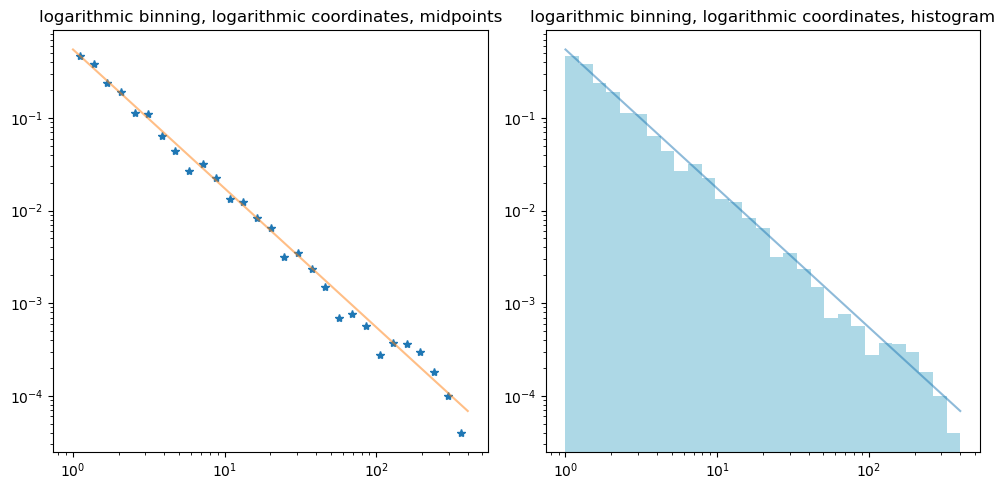

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

pmf(DATA_rej, log_binning=True, log_coordinate=True, plot_mid=True, axs=axs[0]) 
pmf(DATA_rej, log_binning=True, log_coordinate=True, plot_mid=False, axs=axs[1]) 

plt.tight_layout()